In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [85]:
!{sys.executable} -m pip install pyarrow

     |█▉                              | 1.4 MB 2.8 MB/s eta 0:00:09

limit_output extension: Maximum message size of 10000 exceeded with 29130 characters

In [2]:
trip_data_11 = pd.read_parquet("yellow_tripdata_2022-11.parquet")

In [3]:
trip_data_11.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-11-01 00:51:22,2022-11-01 00:56:24,1.0,0.6,1.0,N,151,151,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,0.0,0.0
1,1,2022-11-01 00:39:43,2022-11-01 00:48:44,0.0,1.8,1.0,N,90,79,1,8.5,3.0,0.5,3.05,0.0,0.3,15.35,2.5,0.0
2,1,2022-11-01 00:55:01,2022-11-01 01:01:35,0.0,2.0,1.0,N,137,141,1,8.0,3.0,0.5,2.36,0.0,0.3,14.16,2.5,0.0
3,1,2022-11-01 00:24:49,2022-11-01 00:31:04,2.0,1.0,1.0,N,158,113,1,6.0,3.0,0.5,0.00,0.0,0.3,9.80,2.5,0.0
4,1,2022-11-01 00:37:32,2022-11-01 00:42:23,2.0,0.8,1.0,N,249,158,2,5.5,3.0,0.5,0.00,0.0,0.3,9.30,2.5,0.0


In [4]:
trip_data_11.shape

(3252717, 19)

In [5]:
trip_data_11.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          121958
trip_distance                 0
RatecodeID               121958
store_and_fwd_flag       121958
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     121958
airport_fee              121958
dtype: int64

In [6]:
trip_data_11 = trip_data_11.dropna()

In [7]:
trip_data_11.shape

(3130759, 19)

In [8]:
trip_data_11['PULocationID'].max()

265

In [9]:
trip_data_11['PULocationID'].min()

1

In [10]:
trip_data_11.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [15]:
trip_data_11 = pd.merge(trip_data_11,data_loc , left_on = 'PULocationID', right_on = 'LocationID', how = 'inner')

In [16]:
trip_data_11 = trip_data_11.rename(columns= {'LocationID':'PULocationID_new','Borough':'PUBorough','Zone':'PUZone','service_zone':'PUservice_zone'})

In [17]:
trip_data_11 = pd.merge(trip_data_11,data_loc , left_on = 'DOLocationID', right_on = 'LocationID', how = 'inner')

In [18]:
trip_data_11 = trip_data_11.rename(columns= {'LocationID':'DOLocationID_new','Borough':'DOBorough','Zone':'DOZone','service_zone':'DOservice_zone'})

In [19]:
trip_data_11.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PULocationID_new,PUBorough,PUZone,PUservice_zone,DOLocationID_new,DOBorough,DOZone,DOservice_zone
0,1,2022-11-01 00:51:22,2022-11-01 00:56:24,1.0,0.60,1.0,N,151,151,2,4.5,0.5,0.5,0.00,0.00,0.3,5.80,0.0,0.0,151,Manhattan,Manhattan Valley,Yellow Zone,151,Manhattan,Manhattan Valley,Yellow Zone
1,2,2022-11-01 00:41:59,2022-11-01 00:46:35,1.0,0.60,1.0,N,151,151,2,5.0,0.5,0.5,0.00,0.00,0.3,6.30,0.0,0.0,151,Manhattan,Manhattan Valley,Yellow Zone,151,Manhattan,Manhattan Valley,Yellow Zone
2,2,2022-11-01 01:12:52,2022-11-01 01:14:03,1.0,0.39,2.0,N,151,151,1,52.0,0.0,0.5,11.87,6.55,0.3,71.22,0.0,0.0,151,Manhattan,Manhattan Valley,Yellow Zone,151,Manhattan,Manhattan Valley,Yellow Zone
3,1,2022-11-01 06:59:18,2022-11-01 07:03:39,1.0,0.60,1.0,N,151,151,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,0.0,0.0,151,Manhattan,Manhattan Valley,Yellow Zone,151,Manhattan,Manhattan Valley,Yellow Zone
4,2,2022-11-01 06:37:53,2022-11-01 06:40:53,1.0,0.61,1.0,N,151,151,2,4.0,0.0,0.5,0.00,0.00,0.3,4.80,0.0,0.0,151,Manhattan,Manhattan Valley,Yellow Zone,151,Manhattan,Manhattan Valley,Yellow Zone


In [20]:
trip_data_11.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee',
       'PULocationID_new', 'PUBorough', 'PUZone', 'PUservice_zone',
       'DOLocationID_new', 'DOBorough', 'DOZone', 'DOservice_zone'],
      dtype='object')

In [13]:
data_loc = pd.read_csv("taxi+_zone_lookup.csv")

In [14]:
data_loc[data_loc['LocationID']==238]

,LocationID,Borough,Zone,service_zone
237,238,Manhattan,Upper West Side North,Yellow Zone


In [14]:
data_loc['LocationID'].max()

265

In [15]:
data_loc.dtypes

LocationID       int64
Borough         object
Zone            object
service_zone    object
dtype: object

In [21]:
trip_data_11['route_borough'] = trip_data_11['PUBorough'] + '-' + trip_data_11['DOBorough']
trip_data_11['route_zone'] = trip_data_11['PUZone'] + '-' + trip_data_11['DOZone']
trip_data_11['route_service_zone'] = trip_data_11['PUservice_zone'] + '-' + trip_data_11['DOservice_zone']

In [22]:
trip_data_11['route_service_zone'].unique()

array(['Yellow Zone-Yellow Zone', 'Airports-Yellow Zone',
       'Boro Zone-Yellow Zone', nan, 'Yellow Zone-Boro Zone',
       'Airports-Boro Zone', 'Boro Zone-Boro Zone', 'EWR-Yellow Zone',
       'Yellow Zone-Airports', 'Airports-Airports', 'Boro Zone-Airports',
       'EWR-Airports', 'Yellow Zone-EWR', 'Airports-EWR', 'Boro Zone-EWR',
       'EWR-EWR'], dtype=object)

### high volume for hire vehicle datam

In [65]:
hfhv_data = pd.read_parquet("fhvhv_tripdata_2022-11.parquet")

In [66]:
hfhv_data.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2022-11-01 00:04:09,2022-11-01 00:10:11,2022-11-01 00:10:31,2022-11-01 00:17:28,61,61,1.040,417,7.91,0.0,0.24,0.70,0.00,0.0,0.0,5.40,N,N,,N,N
1,HV0003,B03404,B03404,2022-11-01 00:42:26,2022-11-01 00:45:33,2022-11-01 00:46:33,2022-11-01 00:58:18,209,79,2.070,705,14.48,0.0,0.43,1.29,2.75,0.0,0.0,11.13,N,N,,N,N
2,HV0003,B03404,B03404,2022-11-01 00:11:53,2022-11-01 00:17:15,2022-11-01 00:19:16,2022-11-01 00:46:19,181,170,8.270,1623,27.37,0.0,0.82,2.43,2.75,0.0,0.0,24.14,N,N,,N,N
3,HV0003,B03404,B03404,2022-11-01 00:45:30,2022-11-01 00:49:39,2022-11-01 00:50:18,2022-11-01 01:08:10,107,80,5.020,1072,26.74,0.0,0.80,2.37,2.75,0.0,0.0,17.00,N,N,,N,N
4,HV0005,B03406,None,2022-10-31 23:56:33,NaT,2022-11-01 00:01:41,2022-11-01 00:20:33,41,241,6.322,1132,22.34,0.0,0.67,1.98,0.00,0.0,0.0,17.40,N,N,N,N,N


In [67]:
hfhv_data.groupby('hvfhs_license_num')['dispatching_base_num'].nunique()

hvfhs_license_num
HV0003    17
HV0005     1
Name: dispatching_base_num, dtype: int64

In [68]:
hfhv_data_uber = hfhv_data[hfhv_data['hvfhs_license_num']=='HV0003']

In [69]:
hfhv_data_uber['dispatching_base_num'].unique()

array(['B03404', 'B02764', 'B02872', 'B02887', 'B02869', 'B02870',
       'B02835', 'B02889', 'B02765', 'B02512', 'B02864', 'B02880',
       'B02876', 'B02888', 'B02877', 'B02871', 'B02879'], dtype=object)

In [25]:
fhv_data.shape

(18085896, 24)

In [26]:
fhv_data.isna().sum()

hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    5111093
request_datetime              0
on_scene_datetime       5111094
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64

In [27]:
fhv_data = fhv_data.dropna()

In [28]:
fhv_data.shape

(12974802, 24)

In [29]:
fhv_data['PULocationID'].max()

265

In [30]:
fhv_data['PULocationID'].min()

1

In [31]:
fhv_data.dtypes

hvfhs_license_num               object
dispatching_base_num            object
originating_base_num            object
request_datetime        datetime64[ns]
on_scene_datetime       datetime64[ns]
pickup_datetime         datetime64[ns]
dropoff_datetime        datetime64[ns]
PULocationID                     int64
DOLocationID                     int64
trip_miles                     float64
trip_time                        int64
base_passenger_fare            float64
tolls                          float64
bcf                            float64
sales_tax                      float64
congestion_surcharge           float64
airport_fee                    float64
tips                           float64
driver_pay                     float64
shared_request_flag             object
shared_match_flag               object
access_a_ride_flag              object
wav_request_flag                object
wav_match_flag                  object
dtype: object

In [32]:
fhv_data = pd.merge(fhv_data,data_loc , left_on = 'PULocationID', right_on = 'LocationID', how = 'inner')

In [33]:
fhv_data = fhv_data.rename(columns= {'LocationID':'PULocationID_new','Borough':'PUBorough','Zone':'PUZone','service_zone':'PUservice_zone'})

In [34]:
fhv_data = pd.merge(fhv_data,data_loc , left_on = 'DOLocationID', right_on = 'LocationID', how = 'inner')

In [35]:
fhv_data = fhv_data.rename(columns= {'LocationID':'DOLocationID_new','Borough':'DOBorough','Zone':'DOZone','service_zone':'DOservice_zone'})

In [36]:
fhv_data.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,PULocationID_new,PUBorough,PUZone,PUservice_zone,DOLocationID_new,DOBorough,DOZone,DOservice_zone
0,HV0003,B03404,B03404,2022-11-01 00:04:09,2022-11-01 00:10:11,2022-11-01 00:10:31,2022-11-01 00:17:28,61,61,1.04,417,7.91,0.0,0.24,0.70,0.0,0.0,0.0,5.40,N,N,,N,N,61,Brooklyn,Crown Heights North,Boro Zone,61,Brooklyn,Crown Heights North,Boro Zone
1,HV0003,B03404,B03404,2022-11-01 00:46:54,2022-11-01 00:49:32,2022-11-01 00:49:50,2022-11-01 00:53:39,61,61,0.57,229,7.91,0.0,0.24,0.70,0.0,0.0,0.0,6.67,N,N,,N,N,61,Brooklyn,Crown Heights North,Boro Zone,61,Brooklyn,Crown Heights North,Boro Zone
2,HV0003,B03404,B03404,2022-11-01 00:08:02,2022-11-01 00:14:09,2022-11-01 00:14:31,2022-11-01 00:20:22,61,61,1.37,351,7.91,0.0,0.24,0.70,0.0,0.0,0.0,5.40,N,N,,N,N,61,Brooklyn,Crown Heights North,Boro Zone,61,Brooklyn,Crown Heights North,Boro Zone
3,HV0003,B03404,B03404,2022-11-01 00:22:42,2022-11-01 00:25:05,2022-11-01 00:27:06,2022-11-01 00:33:40,61,61,0.51,394,10.83,0.0,0.32,0.96,0.0,0.0,1.0,7.16,N,N,,N,N,61,Brooklyn,Crown Heights North,Boro Zone,61,Brooklyn,Crown Heights North,Boro Zone
4,HV0003,B03404,B03404,2022-11-01 00:05:30,2022-11-01 00:10:39,2022-11-01 00:12:40,2022-11-01 00:24:25,61,61,1.66,705,12.04,0.0,0.36,1.07,0.0,0.0,0.0,8.19,N,N,,N,N,61,Brooklyn,Crown Heights North,Boro Zone,61,Brooklyn,Crown Heights North,Boro Zone


In [41]:
fhv_data[fhv_data['shared_match_flag']=='Y']['shared_match_flag'].count()

27378

In [43]:
fhv_data[fhv_data['shared_request_flag']=='Y']['shared_request_flag'].count()

199509

In [52]:
fhv_data['hvfhs_license_num'].unique()

array(['HV0003', 'HV0005'], dtype=object)

In [45]:
fhv_data_y = fhv_data[fhv_data['shared_request_flag']=='Y']

In [47]:
fhv_data_y.groupby('hvfhs_license_num')['shared_request_flag'].count()

hvfhs_license_num
HV0003    199509
Name: shared_request_flag, dtype: int64

In [49]:
fhv_data_y_lyft = fhv_data_y[fhv_data_y['hvfhs_license_num']=='HV0005']

In [51]:
fhv_data_y_lyft['shared_match_flag'].count()

0

In [53]:
fhv_data.groupby('hvfhs_license_num').size()


KeyboardInterrupt



In [54]:
fhv_data = pd.read_parquet("fhv_tripdata_2022-11.parquet")

In [55]:
fhv_data.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00008,2022-11-01 00:00:00,2022-11-01 00:30:00,NaN,NaN,None,B00008
1,B00013,2022-11-01 00:37:15,2022-11-01 01:23:00,NaN,NaN,None,B00608
2,B00037,2022-11-01 00:11:18,2022-11-01 00:23:23,NaN,76.0,None,B00037
3,B00037,2022-11-01 00:41:14,2022-11-01 00:47:50,NaN,39.0,None,B00037
4,B00111,2022-11-01 00:30:00,2022-11-01 01:31:00,NaN,NaN,None,B00608


In [56]:
fhv_data.shape

(1106084, 7)

In [64]:
fhv_data[(fhv_data['dispatching_base_num']=='UBER')]

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number


In [62]:
fhv_data.groupby('dispatching_base_num').size()

dispatching_base_num
B00001      681
B00008      976
B00009      734
B00013      723
B00014      956
B00037     2512
B00053      185
B00054      105
B00078      438
B00095      726
B00111     2994
B00112     5907
B00149     1681
B00151        9
B00202     1111
B00208       51
B00221     2438
B00222      570
B00225     2346
B00227     2734
B00235     6753
B00254     6451
B00255       20
B00256    19941
B00271     3390
B00272      786
B00277      820
B00280      612
B00310    17925
B00345       61
B00350      633
B00381      778
B00387      113
B00411      325
B00412     6401
B00429     2057
B00445     3451
B00446     1608
B00448     3306
B00449     3273
B00459      142
B00477        1
B00556      221
B00559       72
B00597      315
B00608      577
B00623      195
B00625      984
B00628     2591
B00647    11179
B00652     1257
B00692     5051
B00706     9745
B00756     3789
B00789     2383
B00802     2513
B00821     9802
B00823      512
B00827      422
B00837     5243
B00850      178
B00

In [ ]:
['B03404', 'B02764', 'B02872', 'B02887', 'B02869', 'B02870','B02835', 'B02889', 'B02765', 'B02512', 'B02864', 'B02880','B02876', 'B02888', 'B02877', 'B02871', 'B02879','B03406']

In [78]:
fhv_data_uber_lyft = fhv_data[fhv_data['Affiliated_base_number'].isin(['B03404', 'B02764', 'B02872', 'B02887', 'B02869', 'B02870','B02835', 'B02889', 'B02765', 'B02512', 'B02864', 'B02880','B02876', 'B02888', 'B02877','B02871','B02879','B03406'])]

In [79]:
fhv_data_uber_lyft.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
6,B00111,2022-11-01 00:52:34,2022-11-01 02:06:00,NaN,NaN,None,B03404
36,B00310,2022-11-01 00:06:07,2022-11-01 00:15:04,NaN,250.0,None,B03404
39,B00310,2022-11-01 00:10:27,2022-11-01 00:29:34,NaN,213.0,None,B03404
76,B00692,2022-11-01 00:48:10,2022-11-01 00:54:55,NaN,61.0,None,B03404
91,B00821,2022-11-01 00:24:17,2022-11-01 00:31:26,NaN,63.0,None,B03404


In [80]:
fhv_data_uber_lyft.shape

(185090, 7)

In [32]:
fhv_data_uber_lyft

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'PULocationID_new', 'PUBorough',
       'PUZone', 'PUservice_zone', 'DOLocationID_new', 'DOBorough', 'DOZone',
       'DOservice_zone'],
      dtype='object')

In [ ]:
fhv_data.columns

In [33]:
fhv_data['route_borough'] = fhv_data['PUBorough'] + '-' + fhv_data['DOBorough']
fhv_data['route_zone'] = fhv_data['PUZone'] + '-' + fhv_data['DOZone']
fhv_data['route_service_zone'] = fhv_data['PUservice_zone'] + '-' + fhv_data['DOservice_zone']

In [34]:
fhv_data['route_service_zone'].unique()

array(['Boro Zone-Boro Zone', 'Yellow Zone-Boro Zone',
       'Airports-Boro Zone', nan, 'Boro Zone-Yellow Zone',
       'Yellow Zone-Yellow Zone', 'Airports-Yellow Zone',
       'Boro Zone-Airports', 'Yellow Zone-Airports', 'Airports-Airports',
       'Boro Zone-EWR', 'Yellow Zone-EWR', 'Airports-EWR', 'EWR-EWR'],
      dtype=object)

In [52]:
fhv_data.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,PULocationID_new,PUBorough,PUZone,PUservice_zone,DOLocationID_new,DOBorough,DOZone,DOservice_zone,route_borough,route_zone,route_service_zone
0,HV0003,B03404,B03404,2022-11-01 00:04:09,2022-11-01 00:10:11,2022-11-01 00:10:31,2022-11-01 00:17:28,61,61,1.04,417,7.91,0.0,0.24,0.70,0.0,0.0,0.0,5.40,N,N,,N,N,61,Brooklyn,Crown Heights North,Boro Zone,61,Brooklyn,Crown Heights North,Boro Zone,Brooklyn-Brooklyn,Crown Heights North-Crown Heights North,Boro Zone-Boro Zone
1,HV0003,B03404,B03404,2022-11-01 00:46:54,2022-11-01 00:49:32,2022-11-01 00:49:50,2022-11-01 00:53:39,61,61,0.57,229,7.91,0.0,0.24,0.70,0.0,0.0,0.0,6.67,N,N,,N,N,61,Brooklyn,Crown Heights North,Boro Zone,61,Brooklyn,Crown Heights North,Boro Zone,Brooklyn-Brooklyn,Crown Heights North-Crown Heights North,Boro Zone-Boro Zone
2,HV0003,B03404,B03404,2022-11-01 00:08:02,2022-11-01 00:14:09,2022-11-01 00:14:31,2022-11-01 00:20:22,61,61,1.37,351,7.91,0.0,0.24,0.70,0.0,0.0,0.0,5.40,N,N,,N,N,61,Brooklyn,Crown Heights North,Boro Zone,61,Brooklyn,Crown Heights North,Boro Zone,Brooklyn-Brooklyn,Crown Heights North-Crown Heights North,Boro Zone-Boro Zone
3,HV0003,B03404,B03404,2022-11-01 00:22:42,2022-11-01 00:25:05,2022-11-01 00:27:06,2022-11-01 00:33:40,61,61,0.51,394,10.83,0.0,0.32,0.96,0.0,0.0,1.0,7.16,N,N,,N,N,61,Brooklyn,Crown Heights North,Boro Zone,61,Brooklyn,Crown Heights North,Boro Zone,Brooklyn-Brooklyn,Crown Heights North-Crown Heights North,Boro Zone-Boro Zone
4,HV0003,B03404,B03404,2022-11-01 00:05:30,2022-11-01 00:10:39,2022-11-01 00:12:40,2022-11-01 00:24:25,61,61,1.66,705,12.04,0.0,0.36,1.07,0.0,0.0,0.0,8.19,N,N,,N,N,61,Brooklyn,Crown Heights North,Boro Zone,61,Brooklyn,Crown Heights North,Boro Zone,Brooklyn-Brooklyn,Crown Heights North-Crown Heights North,Boro Zone-Boro Zone


In [ ]:
fhv_data.to_csv("fhv_data.csv")

In [53]:
fhv_data.shape

(12974802, 35)

In [ ]:
3130759 

## Top 10 borough-routes in terms of number of customers 

<BarContainer object of 10 artists>

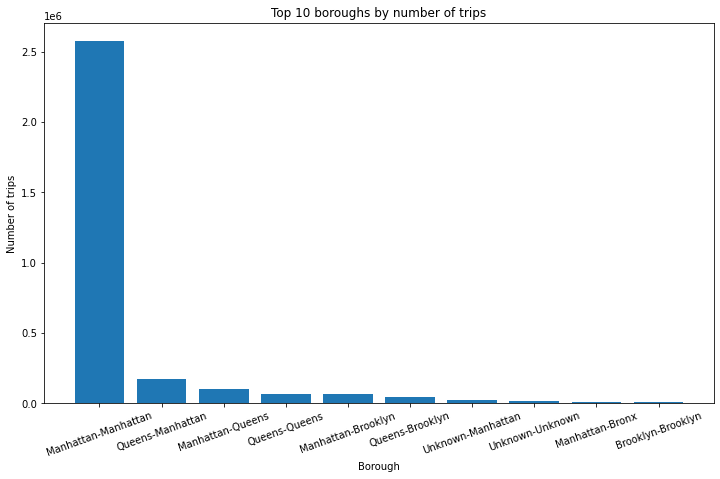

In [109]:
plt.figure(figsize =(12,7))
counts = trip_data_11.groupby('route_borough')['VendorID'].count().sort_values()
top10 = counts.sort_values().tail(10)
plt.xlabel('Borough')
plt.ylabel('Number of trips')
plt.title('Top 10 boroughs by number of trips')
plt.xticks(fontsize=10,rotation = 20)
plt.bar(top10.index[::-1], top10.values[::-1])

<BarContainer object of 10 artists>

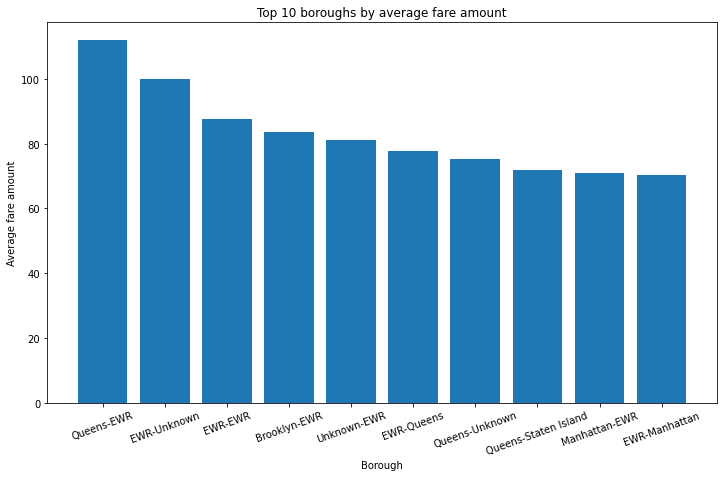

In [110]:
plt.figure(figsize =(12,7))
counts = trip_data_11.groupby('route_borough')['fare_amount'].mean().sort_values()
top10 = counts.sort_values().tail(10)
plt.xlabel('Borough')
plt.ylabel('Average fare amount')
plt.title('Top 10 boroughs by average fare amount')
plt.xticks(fontsize=10,rotation = 20)
plt.bar(top10.index[::-1], top10.values[::-1])

In [73]:
trip_data_11.groupby('route_service_zone')['VendorID'].count().sort_values()

route_service_zone
EWR-Airports                     3
EWR-Yellow Zone                 10
Boro Zone-EWR                  122
Airports-EWR                   259
EWR-EWR                        752
Boro Zone-Airports            3928
Yellow Zone-EWR               7355
Airports-Airports            14394
Boro Zone-Boro Zone          52818
Boro Zone-Yellow Zone        55807
Yellow Zone-Airports         63279
Airports-Boro Zone           93171
Airports-Yellow Zone        144471
Yellow Zone-Boro Zone       222277
Yellow Zone-Yellow Zone    2407217
Name: VendorID, dtype: int64

In [90]:
trip_data_11['dayOfWeek'] = trip_data_11['tpep_pickup_datetime'].dt.day_name()
trip_data_11['Week_Number'] = trip_data_11['tpep_pickup_datetime'].dt.week

/var/folders/q6/t8qqpsn93h95rbj4pdrr_6l00000gn/T/ipykernel_88978/3905500582.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  trip_data_11['Week_Number'] = trip_data_11['tpep_pickup_datetime'].dt.week


In [91]:
trip_data_11.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,PUservice_zone,DOLocationID_new,DOBorough,DOZone,DOservice_zone,route_borough,route_zone,route_service_zone,dayOfWeek,Week_Number
0,1,2022-11-01 00:51:22,2022-11-01 00:56:24,1.0,0.60,1.0,N,151,151,2,...,Yellow Zone,151,Manhattan,Manhattan Valley,Yellow Zone,Manhattan-Manhattan,Manhattan Valley-Manhattan Valley,Yellow Zone-Yellow Zone,Tuesday,44
1,2,2022-11-01 00:41:59,2022-11-01 00:46:35,1.0,0.60,1.0,N,151,151,2,...,Yellow Zone,151,Manhattan,Manhattan Valley,Yellow Zone,Manhattan-Manhattan,Manhattan Valley-Manhattan Valley,Yellow Zone-Yellow Zone,Tuesday,44
2,2,2022-11-01 01:12:52,2022-11-01 01:14:03,1.0,0.39,2.0,N,151,151,1,...,Yellow Zone,151,Manhattan,Manhattan Valley,Yellow Zone,Manhattan-Manhattan,Manhattan Valley-Manhattan Valley,Yellow Zone-Yellow Zone,Tuesday,44
3,1,2022-11-01 06:59:18,2022-11-01 07:03:39,1.0,0.60,1.0,N,151,151,2,...,Yellow Zone,151,Manhattan,Manhattan Valley,Yellow Zone,Manhattan-Manhattan,Manhattan Valley-Manhattan Valley,Yellow Zone-Yellow Zone,Tuesday,44
4,2,2022-11-01 06:37:53,2022-11-01 06:40:53,1.0,0.61,1.0,N,151,151,2,...,Yellow Zone,151,Manhattan,Manhattan Valley,Yellow Zone,Manhattan-Manhattan,Manhattan Valley-Manhattan Valley,Yellow Zone-Yellow Zone,Tuesday,44


In [92]:
trip_data_11.to_parquet("trip_data_modified.parquet")